In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 인덱싱(indexing)
데이터프레임에서 특정한 데이터만 골라내는 것. 
pandas는 numpy행렬과 같이 쉼표를 사용한 (행 인덱스, 열 인덱스) 형식의 2차원 인덱싱을 위해 인덱서(indexer) 속성도 제공.

loc : 라벨값 기반의 2차원 인덱싱
iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱

df.iloc[행 인덱싱값, 열 인덱싱값]

In [10]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_house = pd.concat([dfX, dfy], axis=1)
df_house.tail(20)
# df -> dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1


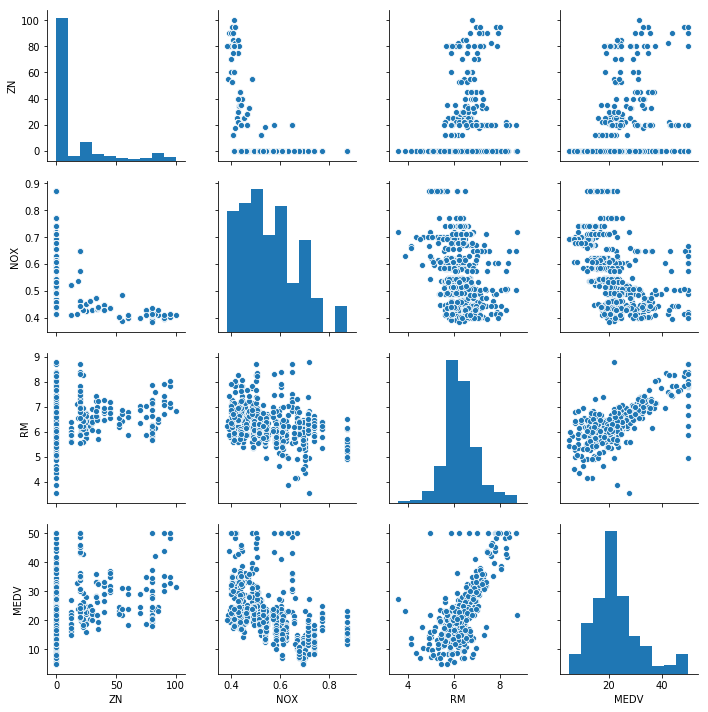

In [13]:
cols = ["ZN", "NOX", "RM", "MEDV"]
sns.pairplot(df_house[cols])
plt.show()

## X, Y 데이터 나누기

In [16]:
x_data = df_house.iloc[:, :]
y_data = df_house.iloc[:, -1]
x_data.tail(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8


In [17]:
y_data

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Train , Test 데이터 분할
## 교차검증
회귀분석 모형을 만들기 위해서는 모수(parameter) 추정, 즉 학습을 위한 데이터 집합이 필요.   
보통 회귀분석 성능을 이야기할 때는 이 학습 데이터 집합의 종속 변수값을 얼마나 잘 예측하였는지를 결정 계수(coefficient of determination) 등을 이용하여 따짐. 표본 내 성능 검증(in-sample testing)이라고 함.    

회귀분석 모형을 만드는 목적 중 하나는 종속 변수의 값을 아직 알지 못하고 학습(parameter 추정)에 사용하지 않은 표본의 대해 종속 변수의 값을 알아내고자 하는 것, 즉 예측(prediction)임.     
학습에 쓰이지 않는 표본 데이터 집합의 종속 변수 값을 얼마나 잘 예측하는가를 검사하는 것은 표본 외 성능 검증(out-of-sample testing) 혹은 교차검증(cross validation)이라고 함.    

* 교차검증에 필요한 두 종류의 데이터 집합
모형 추정, 즉 학습을 위한 데이터 집합 (training data set)    
성능 검증을 위한 데이터 집합 (test data set)    
두 데이터 집합 모두 종속 변수값이 있어야 함.     
보통은 학습/검증 데이터 분리(train-test split) 방법 사용.     
: 가지고 있는 데이터 집합을 학습용과 검증용으로 나눔 -> 학습용 데이터만을 사용하여 회귀분석 모형을 만듦 -> 검증용 데이터로 성능 계산    

## train_test_split
: 데이터를 학습용 데이터와 검증용 데이터로 분리

train_test_split(data, data2, test_size, train_size, random_state)

data: 독립 변수 데이터 배열 또는 pandas 데이터프레임    
data2: 종속 변수 데이터. data 인수에 종속 변수 데이터가 같이 있으면 생략할 수 있다.    
test_size: 검증용 데이터 개수. 1보다 작은 실수이면 비율을 나타낸다.    
train_size: 학습용 데이터의 개수. 1보다 작은 실수이면 비율을 나타낸다. test_size와 train_size 중 하나만 있어도 된다.     
random_state: 난수 시드    

In [18]:
train_x, test_x, train_y, test_y = sk.model_selection.train_test_split(x_data, y_data, test_size = 0.33)

## LinearRegression 모델 생성

In [19]:
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

## 모델 학습

In [20]:
m_reg.fit(train_x, train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 테스트 데이터를 이용해 예측

In [94]:
y_pred = m_reg.predict(test_x)
print(m_reg.score(test_x, test_y))

0.7013551886601271


## OLS

In [95]:
m_reg = sm.OLS(train_y, train_x).fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 09 May 2019   Prob (F-statistic):          4.86e-217
Time:                        11:05:51   Log-Likelihood:                -1025.0
No. Observations:                 339   AIC:                             2076.
Df Residuals:                     326   BIC:                             2126.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1145      0.038     -3.009      0.003      -0.189      -0.040
ZN             0.0556      0.018      3.020      0.003       0.019       0.092
INDUS         -0.0095      0.078     -0.123      0.903      -0.162       0.143
CHAS           2.7561      1.142      2.414      0.016       0.510       5.002
NOX            0.0599      4.768      0.013      0.990      -9.319       9.439
RM             5.6637      0.380     14.915      0.000       4.917       6.411
AGE            0.0043      0.018      0.239      0.811      -0.031       0.040
DIS           -0.9146      0.244     -3.742      0.000      -1.395      -0.434
RAD            0.1850      0.089      2.073      0.039       0.009       0.361
TAX           -0.0084      0.005     -1.596      0.112      -0.019       0.002
PTRATIO       -0.4873      0.138     -3.528      0.000      -0.759      -0.216
B              0.0187      0.003      5.761      0.000       0.012       0.025
LSTAT         -0.4909      0.065     -7.554      0.000      -0.619      -0.363
==============================================================================
Omnibus:                       95.897   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.561
Skew:                           1.100   Prob(JB):                    5.93e-101
Kurtosis:                       8.276   Cond. No.                     9.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Mean Squared Error 

In [96]:
Y_pred = m_reg.predict(test_x)
mse = sk.metrics.mean_squared_error(test_y, Y_pred)
print(mse)

24.172364307913302


## 예측값과 실제 값에 대한 Scatter plot 그리기

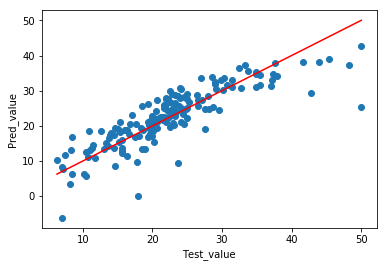

In [97]:
plt.scatter(test_y, y_pred)
line = np.linspace(min(test_y), max(test_y), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('Test_value')
plt.ylabel('Pred_value')
plt.show()